In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_wage = pd.read_csv('data/wage.csv')

In [3]:
df_wage = df_wage.drop(df_wage.columns[0], axis=1)

In [4]:
df_wage

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


In [5]:
df_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.3+ KB


In [6]:
df_wage.describe(include=['O'])

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


In [7]:
plt.style.available

['seaborn-poster',
 'ggplot',
 'seaborn-darkgrid',
 'grayscale',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-muted',
 'bmh',
 'dark_background',
 'seaborn-talk',
 'seaborn-paper',
 'seaborn-white',
 'seaborn-bright',
 'seaborn-dark',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'classic',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-deep',
 'seaborn-notebook']

In [8]:
plt.style.use("fivethirtyeight")

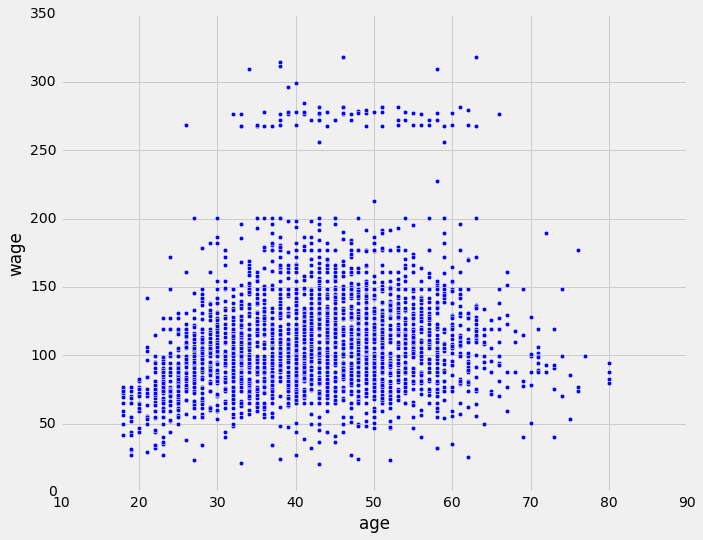

In [9]:
df_wage.plot.scatter('age', 'wage', figsize=(10,8));

In [10]:
df_e = df_wage.pivot(columns='education', values='wage')

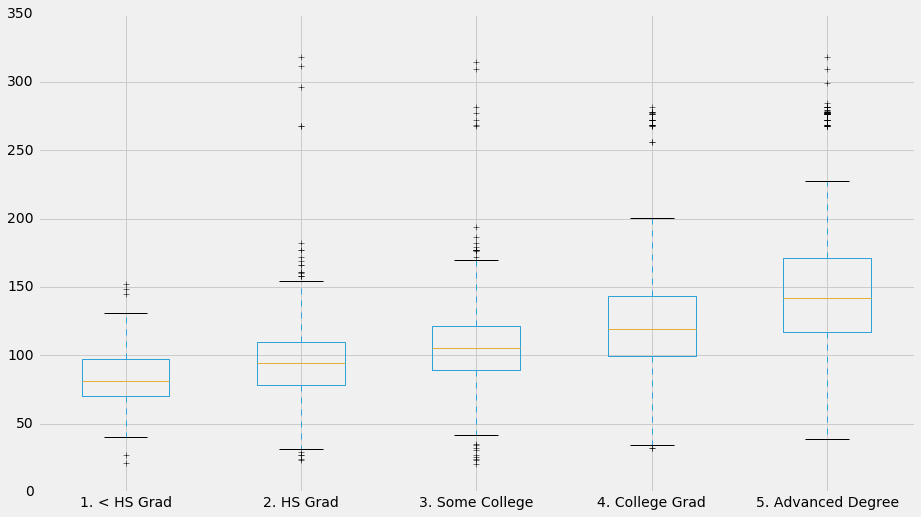

In [11]:
df_e.plot.box(figsize=(14,8));

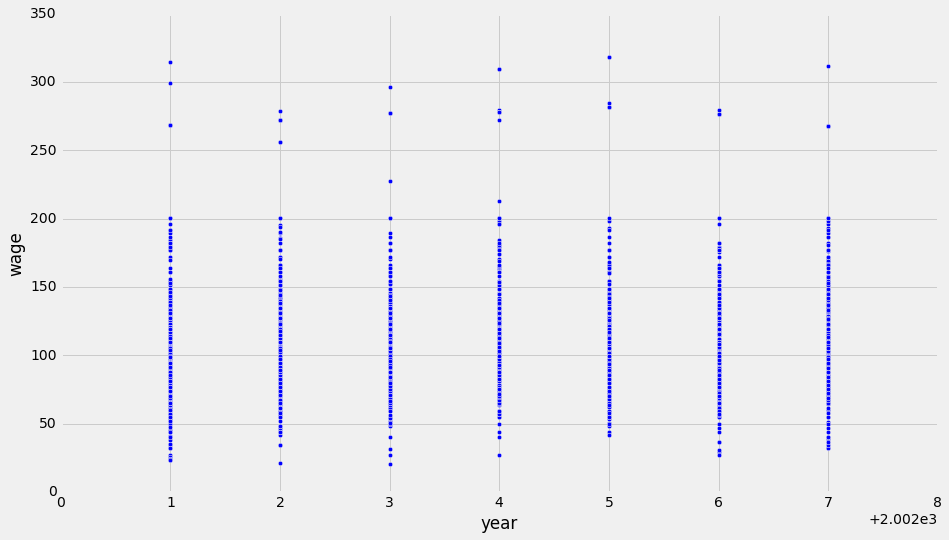

In [12]:
df_wage.plot.scatter('year', 'wage', figsize=(14,8))

In [13]:
import seaborn as sns

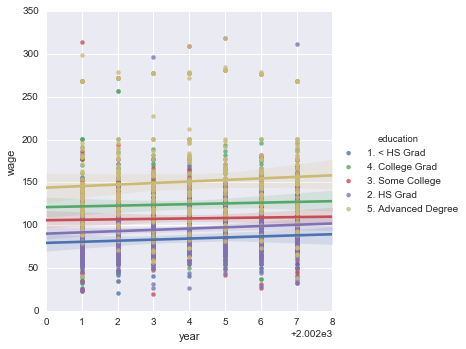

In [14]:
sns.lmplot('year', 'wage', data=df_wage, ci=99.99, hue='education');

In [15]:
df_adv = pd.read_csv('data/Advertising.csv', index_col=0)

In [16]:
df_adv_new = pd.melt(df_adv, value_vars=['TV', 'Radio', 'Newspaper'], id_vars='Sales', value_name='adv_budget')

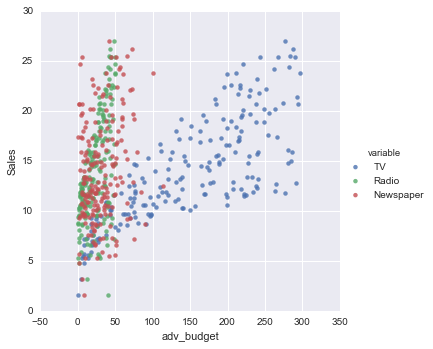

In [17]:
sns.lmplot('adv_budget', 'Sales', data=df_adv_new, hue='variable', fit_reg=False);

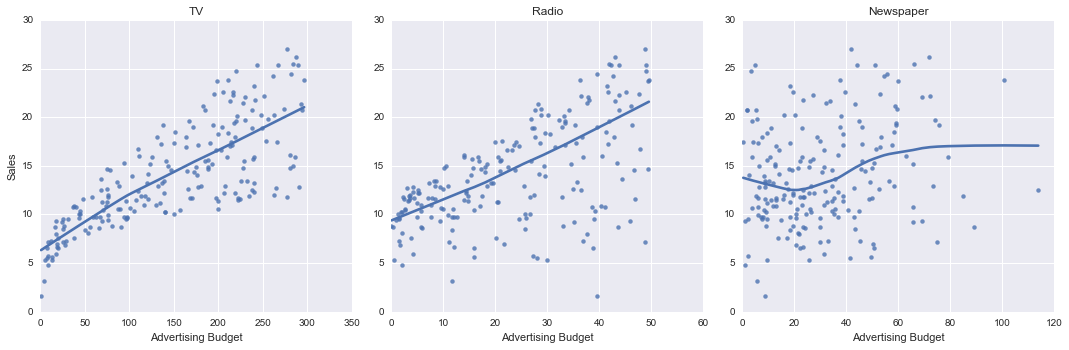

In [55]:
lm = sns.lmplot('adv_budget', 'Sales', data=df_adv_new, col='variable', sharey=False, sharex=False, lowess=True);
axes = lm.axes
for i, ax in enumerate(axes[0]):
    ax.set_xlim(0,)
    ax.set_title(lm.col_names[i])
    ax.set_xlabel('Advertising Budget')